In [2]:
import numpy as np
from sklearn.datasets import make_blobs
from keras.utils import to_categorical
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
# hello


In [3]:
# prepare multi-class classification dataset
def create_dataset():
	# generate 2d classification dataset
	X, y = make_blobs(n_samples=1000, centers=20, n_features=100, cluster_std=2, random_state=2)
	# one hot encode output variable
	y = to_categorical(y)
	# split into train and test
	n_train = 500
	trainX, testX = X[:n_train, :], X[n_train:, :]
	trainy, testy = y[:n_train], y[n_train:]
	return trainX, trainy, testX, testy

In [4]:
trainX, trainy, testX, testy = create_dataset()

In [5]:
n_input, n_classes = trainX.shape[1], testy.shape[1]

In [6]:
trainX.shape

(500, 100)

In [7]:
testy.shape

(500, 20)

In [8]:
trainy.shape

(500, 20)

In [9]:
n_classes

20

In [10]:
model = tf.keras.Sequential()
model.add(layers.Dense(10,activation='relu', name='layer1', input_shape=(n_input,)))
model.add(layers.Dense(n_classes, activation='softmax', name='layer2'))
model.compile(optimizer='sgd', loss = 'categorical_crossentropy', metrics=['accuracy'])
# This builds the model for the first time:
model.fit(trainX, trainy, epochs=100)  

Epoch 1/100


16/16 [==============================] - 0s 400us/step - loss: 4.8549 - accuracy: 0.1280
Epoch 2/100
16/16 [==============================] - 0s 352us/step - loss: 1.8136 - accuracy: 0.4120
Epoch 3/100
16/16 [==============================] - 0s 342us/step - loss: 1.2158 - accuracy: 0.6880
Epoch 4/100
16/16 [==============================] - 0s 333us/step - loss: 0.9473 - accuracy: 0.7400
Epoch 5/100
16/16 [==============================] - 0s 325us/step - loss: 0.7632 - accuracy: 0.7840
Epoch 6/100
16/16 [==============================] - 0s 309us/step - loss: 0.6167 - accuracy: 0.8380
Epoch 7/100
16/16 [==============================] - 0s 309us/step - loss: 0.4975 - accuracy: 0.8680
Epoch 8/100
16/16 [==============================] - 0s 307us/step - loss: 0.4022 - accuracy: 0.8880
Epoch 9/100
16/16 [==============================] - 0s 292us/step - loss: 0.3298 - accuracy: 0.9360
Epoch 10/100
16/16 [==============================] - 0s 297us/step - loss: 0.2705 - accuracy: 0.9500
E

2023-06-30 13:56:08.549840: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


16/16 [==============================] - 0s 298us/step - loss: 0.1873 - accuracy: 0.9620
Epoch 15/100
16/16 [==============================] - 0s 296us/step - loss: 0.1796 - accuracy: 0.9620
Epoch 16/100
16/16 [==============================] - 0s 300us/step - loss: 0.1731 - accuracy: 0.9620
Epoch 17/100
16/16 [==============================] - 0s 293us/step - loss: 0.1674 - accuracy: 0.9620
Epoch 18/100
16/16 [==============================] - 0s 305us/step - loss: 0.1621 - accuracy: 0.9620
Epoch 19/100
16/16 [==============================] - 0s 316us/step - loss: 0.1569 - accuracy: 0.9620
Epoch 20/100
16/16 [==============================] - 0s 286us/step - loss: 0.1517 - accuracy: 0.9620
Epoch 21/100
16/16 [==============================] - 0s 287us/step - loss: 0.1461 - accuracy: 0.9620
Epoch 22/100
16/16 [==============================] - 0s 303us/step - loss: 0.1403 - accuracy: 0.9600
Epoch 23/100
16/16 [==============================] - 0s 256us/step - loss: 0.1342 - accuracy: 

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 10)                1010      
                                                                 
 layer2 (Dense)              (None, 20)                220       
                                                                 
Total params: 1,230
Trainable params: 1,230
Non-trainable params: 0
_________________________________________________________________


In [12]:
loss_val, test_acc = model.evaluate(testX, testy, verbose=0)
test_acc

1.0

In [21]:
## number of hidden layers is 1 but # of neurons/nodes is variable 

def evaluate_model(n_nodes, trainX, trainy, testX, testy):
    model = tf.keras.Sequential()
    model.add(layers.Dense(n_nodes,activation='relu', name='layer1', input_shape=(n_input,)))
    model.add(layers.Dense(n_classes, activation='softmax', name='layer2'))
    model.compile(optimizer='sgd', loss = 'categorical_crossentropy', metrics=['accuracy'])
    # This builds the model for the first time:
    history = model.fit(trainX, trainy, epochs=90, verbose=0)  
    loss_val, test_acc = model.evaluate(testX, testy, verbose=0)
    
    return history, test_acc


nodes=1: 0.094
nodes=2: 0.326
nodes=3: 0.550
nodes=4: 0.874
nodes=5: 0.998
nodes=6: 1.000
nodes=7: 0.992
nodes=50: 1.000


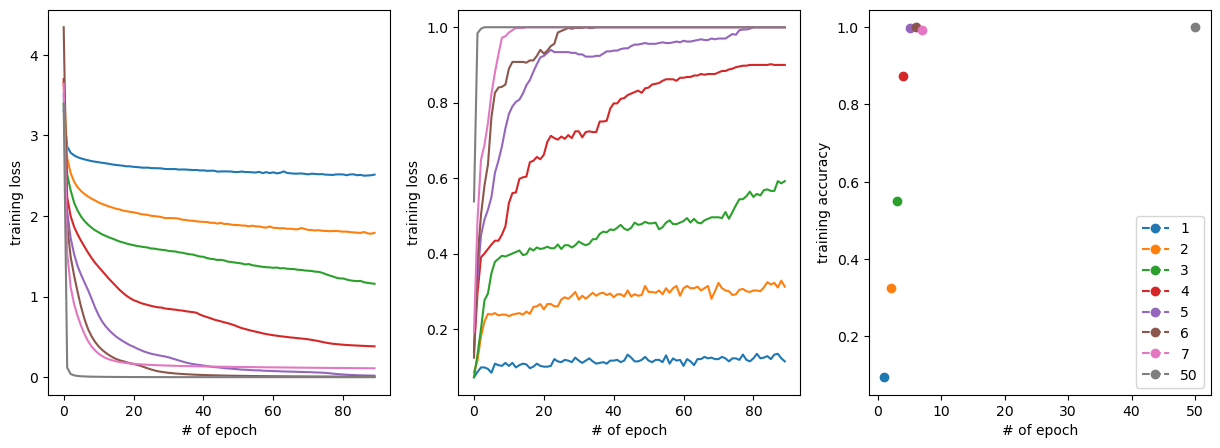

In [24]:
num_nodes = [1, 2, 3, 4, 5, 6, 7, 50]
plt.figure(figsize=(15,5))
for n_nodes in num_nodes:
  # evaluate model with a given number of nodes
  history, result = evaluate_model(n_nodes, trainX, trainy, testX, testy)
  # summarize final test set accuracy
  print('nodes=%d: %.3f' % (n_nodes, result))

  # plot learning curve 
  plt.subplot(1,3,1)
  plt.plot(history.history['loss'], label=str(n_nodes))
  plt.xlabel('# of epoch')
  plt.ylabel('training loss')

  plt.subplot(1,3,2)
  plt.plot(history.history['accuracy'], label=str(n_nodes))
  plt.xlabel('# of epoch')
  plt.ylabel('training loss')

  plt.subplot(1,3,3)
  plt.plot(n_nodes, result, label=str(n_nodes), marker = 'o', linestyle='--')
  plt.xlabel('# of epoch')
  plt.ylabel('training accuracy')

# show the plot

plt.legend()
plt.show()

### Observations
- Noisy result: training loss is not monotonically decreasing
-- When we go from one epoch to another sometimes error increases .. why?

- Noisy result: test accuracy is not monotonically increasing 
-- Can the result get worse.. lets say as we increase # of nodes so because of overfitting
-- any other loss function
-- any other initialization?